# Importing the required libraries and packages

In [0]:
import time

import matplotlib.pyplot as plt
import numpy as np

from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import cifar10

% matplotlib inline

In [0]:
np.random.seed(2017) 

# Loading the data 

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))
print(num_test)

10000


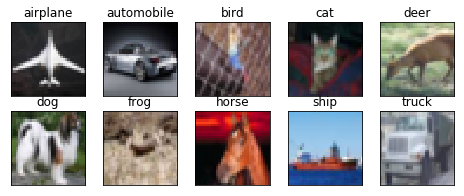

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

fig = plt.figure(figsize=(8,3))

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)

plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Model Architecture

Here, I've changed the model from having Dense layers to the actual Convolution layers.

In [0]:
# Define the model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3))) # 30 - 3rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 28 - 5rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 26 - 7rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 26 - 7rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(MaxPooling2D(pool_size=(2, 2))) # 13 - 8rf
model.add(Dropout(0.05))

model.add(Conv2D(64, (3, 3))) # 11 - 12rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(96, (3, 3))) # 9 - 14rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(128, (3, 3))) # 7 - 16rf
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.05))

model.add(Conv2D(32, (1, 1))) # 7 - 16 rf
model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Activation('relu'))

model.add(Conv2D(32, (7, 7))) # 1 - 28rf
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Conv2D(10, (1, 1))) # 1 - 28rf

model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
activation_21 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_22 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 28, 28, 64)        256       
__________

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, shuffle=False, steps_per_epoch=390, epochs=100)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/100
390/390 [==============================] - 24s 62ms/step - loss: 1.4524 - acc: 0.4772 - val_loss: 1.6789 - val_acc: 0.4483
Epoch 2/100
390/390 [==============================] - 22s 56ms/step - loss: 0.9819 - acc: 0.6535 - val_loss: 0.9607 - val_acc: 0.6593
Epoch 3/100
390/390 [==============================] - 22s 56ms/step - loss: 0.8031 - acc: 0.7195 - val_loss: 0.9411 - val_acc: 0.6713
Epoch 4/100
390/390 [==============================] - 22s 56ms/step - loss: 0.6989 - acc: 0.7550 - val_loss: 0.8106 - val_acc: 0.7190
Epoch 5/100
390/390 [==============================] - 22s 55ms/step - loss: 0.6309 - acc: 0.7816 - val_loss: 0.8817 - val_acc: 0.7092
Epoch 6/100
390/390 [==============================] - 22s 56ms/step - loss: 0.5722 - acc: 0.8027 - val_loss: 0.7813 - val_acc: 0.7320
Epoch 7/100
390/390 [==============================] - 22s 56ms/step - loss: 0.5170 - acc: 0.8205 - val_loss: 0.8288 - val_acc: 0.7190
Epoch 8/100
390/390 [==============================] - 

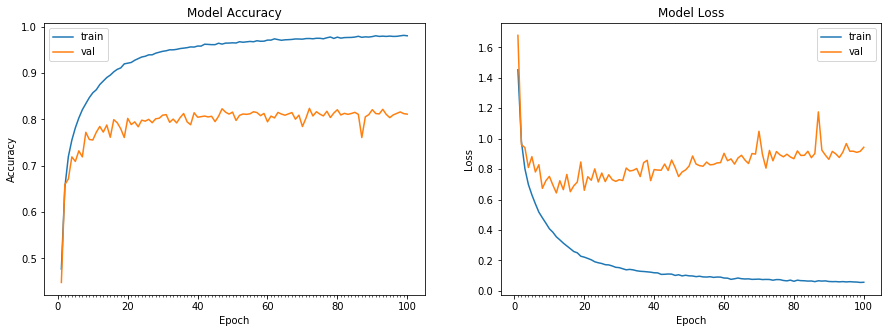

Accuracy on test data is: 81.11


In [0]:
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1, shuffle=False)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

The accuracy achieved in the **raw implementation was 91.93%.** Here in the modified architecture, the **accuracy achieved is 98.01%**. 

The raw implementation accuracy was **overcome in the 20th epoch** itself.